# Exercise: Generating one token at a time

In this exercise, we will get to understand how an LLM generates text--one token at a time, using the previous tokens to predict the following ones.

In [ ]:
# Step 1.  Load a tokenizer and a model
# First load a tokenizer and a model from HuggingFace's transformers library. 
from transformers import AutoModelForCausalLM, AutoTokenizer
# Load a tokenizer using HuggingFace
tokenizer = AutoTokenizer.from_pretrained("gpt2")

/home/sriramramesh/miniconda3/envs/drl_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Load a pretrained model
model = AutoModelForCausalLM.from_pretrained("gpt2")

In [3]:
text = "Udacity is the best place to learn about generative"

In [4]:
inputs = tokenizer(text, return_tensors="pt")

In [5]:
inputs["input_ids"]

tensor([[  52,   67, 4355,  318,  262, 1266, 1295,  284, 2193,  546, 1152,  876]])

In [6]:
# Show how the sentence is tokenized
import pandas as pd


def show_tokenization(inputs):
    return pd.DataFrame(
        [(id, tokenizer.decode(id)) for id in inputs["input_ids"][0]],
        columns=["id", "token"],
    )


show_tokenization(inputs)

,id,token
0,tensor(52),U
1,tensor(67),d
2,tensor(4355),acity
3,tensor(318),is
4,tensor(262),the
5,tensor(1266),best
6,tensor(1295),place
7,tensor(284),to
8,tensor(2193),learn
9,tensor(546),about


In [7]:
# Calculate the probabilities for the next token for all possible choices. We show the
# top 5 choices and the corresponding words or subwords for these tokens.

import torch

with torch.no_grad():
    logits = model(**inputs).logits[:, -1, :]
    probabilities = torch.nn.functional.softmax(logits[0], dim=-1)


def show_next_token_choices(probabilities, top_n=5):
    return pd.DataFrame(
        [
            (id, tokenizer.decode(id), p.item())
            for id, p in enumerate(probabilities)
            if p.item()
        ],
        columns=["id", "token", "p"],
    ).sort_values("p", ascending=False)[:top_n]


show_next_token_choices(probabilities)

,id,token,p
8300,8300,programming,0.157599
4673,4673,learning,0.148412
4981,4981,models,0.048504
17219,17219,biology,0.046482
16113,16113,algorithms,0.027794


In [10]:
probabilities.size()

torch.Size([50257])

In [11]:
# Obtain the token id for the most probable next token
next_token_id = torch.argmax(probabilities).item()

In [13]:
tokenizer.decode(next_token_id)

' programming'

In [ ]:
# We append the most likely token to the text.
text = text + tokenizer.decode(8300)
text

'Udacity is the best place to learn about generative programming'

In [15]:
# Generate some more tokens
from IPython.display import Markdown, display

# Show the text
print(text)

Udacity is the best place to learn about generative programming


In [16]:
# Convert to tokens
inputs = tokenizer(text, return_tensors="pt")

In [17]:
# Calculate the probabilities for the next token and show the top 5 choices
with torch.no_grad():
    logits = model(**inputs).logits[:, -1, :]
    probabilities = torch.nn.functional.softmax(logits[0], dim=-1)

In [18]:
display(Markdown("**Next token probabilities:**"))
display(show_next_token_choices(probabilities))

**Next token probabilities:**

,id,token,p
13,13,.,0.352223
11,11,",",0.135986
290,290,and,0.109372
287,287,in,0.069531
8950,8950,languages,0.058290


In [ ]:
# Choose the most likely token id and add it to the text
next_token_id = torch.argmax(probabilities).item()
text = text + tokenizer.decode(next_token_id)

In [20]:
# Use the Generate method
output = model.generate(**inputs, max_length=100, pad_token_id=tokenizer.eos_token_id)
display(Markdown(tokenizer.decode(output[0])))

Udacity is the best place to learn about generative programming.

The first thing you need to know is that generative programming is a very powerful programming language. It is a very powerful programming language that can be used to create complex programs. It is also very powerful for debugging.

The second thing you need to know is that generative programming is very powerful for debugging. It is very powerful for debugging because it is very powerful for debugging.

The third thing you need

In [1]:
# Cross entropy Loss
import torch
import torch.nn as nn

loss_function = nn.CrossEntropyLoss()

In [2]:
# Dataset contains a single image of a dog, where cat = 0 and dog = 1
target_tensor = torch.tensor([1])

In [3]:
target_tensor

tensor([1])

In [4]:
predicted_tensor = torch.tensor([[2.0, 6.0]])
loss_value = loss_function(predicted_tensor, target_tensor)
loss_value

tensor(0.0181)

In [5]:
predicted_tensor = torch.tensor([[1.5, 1.1]])
loss_value = loss_function(predicted_tensor, target_tensor)
loss_value

tensor(0.9130)

In [6]:
# Mean squared error loss
# Define the loss function
loss_function = nn.MSELoss()

# Define the predicted and actual values as tensors
predicted_tensor = torch.tensor([320000.0])
actual_tensor = torch.tensor([300000.0])

# Compute the MSE loss
loss_value = loss_function(predicted_tensor, actual_tensor)
print(loss_value.item()) # Loss value: 20000 * 20000 / 1 = ...
# 400000000.0

400000000.0


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [8]:
class NumberSumDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))

    def __getitem__(self, index):
        number1 = float(self.numbers[index // len(self.numbers)])
        number2 = float(self.numbers[index % len(self.numbers)])
        return torch.tensor([number1, number2]), torch.tensor([number1 + number2])

    def __len__(self):
        return len(self.numbers) ** 2

In [9]:
dataset = NumberSumDataset(data_range=(1, 100))

In [10]:
for i in range(5):
    print(dataset[i])

(tensor([1., 1.]), tensor([2.]))
(tensor([1., 2.]), tensor([3.]))
(tensor([1., 3.]), tensor([4.]))
(tensor([1., 4.]), tensor([5.]))
(tensor([1., 5.]), tensor([6.]))


In [11]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, 128)
        self.output_layer = nn.Linear(128, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)

In [12]:
dataset = NumberSumDataset(data_range=(0, 100))
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)
model = MLP(input_size=2)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [15]:
for epoch in range(100):
    total_loss = 0.0
    for number_pairs, sums in dataloader:  # Iterate over the batches
        predictions = model(number_pairs)  # Compute the model output
        loss = loss_function(predictions, sums)  # Compute the loss
        loss.backward()  # Perform backpropagation
        optimizer.step()  # Update the parameters
        optimizer.zero_grad()  # Zero the gradients

        total_loss += loss.item()  # Add the loss for all batches

    # Print the loss for this epoch
    print("Epoch {}: Sum of Batch Losses = {:.5f}".format(epoch, total_loss))

Epoch 0: Sum of Batch Losses = 2.16921
Epoch 1: Sum of Batch Losses = 1.93687
Epoch 2: Sum of Batch Losses = 1.65350
Epoch 3: Sum of Batch Losses = 1.21926
Epoch 4: Sum of Batch Losses = 0.85465
Epoch 5: Sum of Batch Losses = 0.62489
Epoch 6: Sum of Batch Losses = 0.48567
Epoch 7: Sum of Batch Losses = 0.42178
Epoch 8: Sum of Batch Losses = 0.37700
Epoch 9: Sum of Batch Losses = 0.34546
Epoch 10: Sum of Batch Losses = 0.32450
Epoch 11: Sum of Batch Losses = 0.30967
Epoch 12: Sum of Batch Losses = 0.28974
Epoch 13: Sum of Batch Losses = 0.27763
Epoch 14: Sum of Batch Losses = 0.26689
Epoch 15: Sum of Batch Losses = 0.25652
Epoch 16: Sum of Batch Losses = 0.24208
Epoch 17: Sum of Batch Losses = 0.23353
Epoch 18: Sum of Batch Losses = 0.22976
Epoch 19: Sum of Batch Losses = 0.21911
Epoch 20: Sum of Batch Losses = 0.21592
Epoch 21: Sum of Batch Losses = 0.20659
Epoch 22: Sum of Batch Losses = 0.19771
Epoch 23: Sum of Batch Losses = 0.19279
Epoch 24: Sum of Batch Losses = 0.18858
Epoch 25: 

In [16]:
model(torch.tensor([3.0, 7.0]))

tensor([9.9992], grad_fn=<ViewBackward0>)

In [1]:
from transformers import BertTokenizer

In [2]:
# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [3]:
# Print to see how many tokens are in the vocabulary
tokenizer.vocab_size

30522

In [4]:
# Tokenize the sentence
tokens = tokenizer.tokenize("I heart Generative AI")

In [5]:
# Print the tokens
print(tokens)

['i', 'heart', 'genera', '##tive', 'ai']


In [6]:
# Show the token ids assigned to each token
print(tokenizer.convert_tokens_to_ids(tokens))

[1045, 2540, 11416, 6024, 9932]


In [7]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

In [8]:
# Load a pre-trained sentiment analysis model
model_name = "textattack/bert-base-uncased-imdb"
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

In [16]:
# Tokenize the input sequence
tokenizer = BertTokenizer.from_pretrained(model_name)
inputs = tokenizer("I heart Generative AI", return_tensors="pt")

In [17]:
# Make prediction
with torch.no_grad():
    outputs = model(**inputs).logits
    probabilities = torch.nn.functional.softmax(outputs, dim=1)
    predicted_class = torch.argmax(probabilities)

In [18]:
# Display sentiment result
if predicted_class == 1:
    print(f"Sentiment: Positive ({probabilities[0][1] * 100:.2f}%)")
else:
    print(f"Sentiment: Negative ({probabilities[0][0] * 100:.2f}%)")

Sentiment: Positive (77.42%)


In [1]:
from datasets import load_dataset
from IPython.display import HTML, display

/home/sriramramesh/miniconda3/envs/drl_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the IMDB dataset, which contains movie reviews
# and sentiment labels (positive or negative)
dataset = load_dataset("imdb")

Generating unsupervised split: 100%|██████████| 50000/50000 [00:00<00:00, 493644.99 examples/s]


In [3]:
# Fetch a review from the training set
review_number = 42
sample_review = dataset["train"][review_number]

In [4]:
display(HTML(sample_review["text"][:450] + "..."))

In [5]:
if sample_review["label"] == 1:
    print("Sentiment: Positive")
else:
    print("Sentiment: Negative")

Sentiment: Negative


In [1]:
from transformers import (DistilBertForSequenceClassification,
    DistilBertTokenizer,
    TrainingArguments,
    Trainer
)
from datasets import load_dataset

/home/sriramramesh/miniconda3/envs/drl_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

In [4]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

In [5]:
dataset = load_dataset("imdb")
tokenized_datasets = dataset.map(tokenize_function, batched=True)

In [6]:
training_args = TrainingArguments(
    per_device_train_batch_size=64,
    output_dir="./results",
    learning_rate=2e-5,
    num_train_epochs=3,
)

In [7]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
)

In [ ]:
trainer.train()

In [1]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
device

device(type='cuda')

In [3]:
tsr = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], device = device)

In [4]:
tsr

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]], device='cuda:0')

In [5]:
!nvidia-smi

Sat Jul 19 21:20:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.51.03              Driver Version: 575.51.03      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   45C    P8              2W /   55W |     773MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
import torch.nn as nn


class MyMLP(nn.Module):
    """My Multilayer Perceptron (MLP)

    Specifications:

        - Input layer: 784 neurons
        - Hidden layer: 128 neurons with ReLU activation
        - Output layer: 10 neurons with softmax activation

    """

    def __init__(self):
        super(MyMLP, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass the input to the second layer
        x = self.fc1(x)

        # Apply ReLU activation
        x = self.relu(x)

        # Pass the result to the final layer
        x = self.fc2(x)

        # Apply softmax activation
        x = self.softmax(x)

        return x


my_mlp = MyMLP()
print(my_mlp)

MyMLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


In [7]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer (by convention we use the variable optimizer)
optimizer = torch.optim.SGD(my_mlp.parameters(), lr=0.01)

In [8]:
def fake_training_loaders():
    for _ in range(30):
        yield torch.randn(64, 784), torch.randint(0, 10, (64,))


for epoch in range(3):
    # Create a training loop
    for i, data in enumerate(fake_training_loaders()):
        # Every data instance is an input + label pair
        x, y = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Forward pass (predictions)
        y_pred = my_mlp(x)

        # Compute the loss and its gradients
        loss = loss_fn(y_pred, y)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        if i % 10 == 0:
            print(f"Epoch {epoch}, batch {i}: {loss.item():.5f}")

Epoch 0, batch 0: 2.30864
Epoch 0, batch 10: 2.30624
Epoch 0, batch 20: 2.31160
Epoch 1, batch 0: 2.29776
Epoch 1, batch 10: 2.30110
Epoch 1, batch 20: 2.30250
Epoch 2, batch 0: 2.30294
Epoch 2, batch 10: 2.29985
Epoch 2, batch 20: 2.30323


In [9]:
assert abs(loss.item() - 2.3) < 0.1, "the loss should be around 2.3 with random data"

In [10]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

/home/sriramramesh/miniconda3/envs/drl_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
!nvidia-smi

Sat Jul 19 22:33:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.51.03              Driver Version: 575.51.03      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   42C    P3             12W /   55W |     700MiB /   8188MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [12]:
pt_model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
)

In [13]:
!nvidia-smi

Sat Jul 19 22:34:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.51.03              Driver Version: 575.51.03      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   43C    P4             10W /   55W |     683MiB /   8188MiB |     30%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [14]:
tokenizer = AutoTokenizer.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
)

In [15]:
!nvidia-smi

Sat Jul 19 22:34:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.51.03              Driver Version: 575.51.03      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   43C    P3             11W /   55W |     672MiB /   8188MiB |     32%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [16]:
def get_prediction(review):
    """Given a review, return the predicted sentiment"""

    # Tokenize the review
    # (Get the response as tensors and not as a list)
    inputs = tokenizer(review, return_tensors="pt")

    # Perform the prediction (get the logits)
    outputs = pt_model(**inputs)

    # Get the predicted class (corresponding to the highest logit)
    predictions = torch.argmax(outputs.logits, dim=-1)

    return "positive" if predictions.item() == 1 else "negative"

In [17]:
review = "This movie is not so great :("

In [18]:
print(f"Review: {review}")
print(f"Sentiment: {get_prediction(review)}")

Review: This movie is not so great :(
Sentiment: negative


In [19]:
review = "This movie rocks!"

print(f"Review: {review}")
print(f"Sentiment: {get_prediction(review)}")

Review: This movie rocks!
Sentiment: positive


In [20]:
!nvidia-smi

Sat Jul 19 22:36:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.51.03              Driver Version: 575.51.03      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   44C    P0             10W /   55W |     727MiB /   8188MiB |     64%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [21]:
!nvidia-smi

Sat Jul 19 22:36:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.51.03              Driver Version: 575.51.03      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   43C    P8              2W /   55W |     651MiB /   8188MiB |      8%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [22]:
from datasets import load_dataset

# Load the test split of the imdb dataset
dataset = load_dataset("imdb", split="test")

dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [23]:
!nvidia-smi

Sat Jul 19 22:37:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.51.03              Driver Version: 575.51.03      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   43C    P5              7W /   55W |     663MiB /   8188MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [24]:
from pprint import pprint

from datasets import Dataset

assert isinstance(dataset, Dataset), "The dataset should be a Dataset object"
assert set(dataset.features.keys()) == {
    "label",
    "text",
}, "The dataset should have a label and a text feature"

# Show the first example
pprint(dataset[0])

{'label': 0,
 'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV '
         'are usually underfunded, under-appreciated and misunderstood. I '
         'tried to like this, I really did, but it is to good TV sci-fi as '
         'Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap '
         "cardboard sets, stilted dialogues, CG that doesn't match the "
         'background, and painfully one-dimensional characters cannot be '
         "overcome with a 'sci-fi' setting. (I'm sure there are those of you "
         "out there who think Babylon 5 is good sci-fi TV. It's not. It's "
         'clichéd and uninspiring.) While US viewers might like emotion and '
         'character development, sci-fi is a genre that does not take itself '
         'seriously (cf. Star Trek). It may treat important issues, yet not as '
         "a serious philosophy. It's really difficult to care about the "
         'characters here as they are not simply foolish, ju

In [26]:
reviews = dataset["text"][-3:]
labels = dataset["label"][-3:]

for review, label in zip(reviews, labels):
    # Let's use your get_prediction function to get the sentiment
    # of the review!
    prediction = get_prediction(review)

    print(f"Review: {review[:80]} \n... {review[-80:]}")
    print(f'Label: {"positive" if label else "negative"}')
    print(f"Prediction: {prediction}\n")

Review: I got Monster Man in a box set of three films where I mainly wanted the other tw 
... ous, often gnarly splatter comedy that should endear itself to fans of the same.
Label: positive
Prediction: positive

Review: Five minutes in, i started to feel how naff this was looking, you've got a compl 
... for anyone who likes their horror with several side orders of gore and attitude.
Label: positive
Prediction: positive

Review: I caught this movie on the Sci-Fi channel recently. It actually turned out to be 
... e more than passable for the horror/slasher buff. Definitely worth checking out.
Label: positive
Prediction: positive



In [1]:
!nvidia-smi

Sat Jul 19 22:43:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.51.03              Driver Version: 575.51.03      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   43C    P4             11W /   55W |     576MiB /   8188MiB |     13%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Exercise: Transfer learning using MobileNetV3

In the field of machine learning, transfer learning is a powerful technique that leverages pre-trained models and applies them to new tasks. This approach allows us to save time and computational resources by reusing the knowledge gained from training on large datasets.

In this exercise we use MobileNetV3, a convolutional neural network architecture for mobile devices, to train a classifier for the Fashion-MNIST dataset using the PyTorch framework.

Fashion-MNIST is a drop-in replacement for MNIST (images of size 28x28 with 10 classes) but instead of hand-written digits it contains tiny images of clothes!

## Steps

1. Load the Fashion-MNIST dataset using the torchvision package.
2. Define a PyTorch model using the MobileNetV3 architecture.
3. Train the model on the Fashion-MNIST dataset.
4. Evaluate the model on the test set.

In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms


def load_data(batch_size, data_dir="data"):
    """Load the Fashion-MNIST dataset."""

    # Define transforms to normalize the data
    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
    )

    # Download and load the training data
    trainset = datasets.FashionMNIST(
        data_dir, download=True, train=True, transform=transform
    )
    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=batch_size, shuffle=True
    )

    # Download and load the test data
    testset = datasets.FashionMNIST(
        data_dir, download=True, train=False, transform=transform
    )
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=batch_size, shuffle=True
    )

    return trainloader, testloader


trainloader, testloader = load_data(64)

In [3]:
# Define some helper functions to helps with the labels
def get_class_names():
    """Return the list of classes in the Fashion-MNIST dataset."""
    return [
        "T-shirt/top",
        "Trouser",
        "Pullover",
        "Dress",
        "Coat",
        "Sandal",
        "Shirt",
        "Sneaker",
        "Bag",
        "Ankle boot",
    ]


def get_class_name(class_index):
    """Return the class name for the given index."""
    return get_class_names()[class_index]


def get_class_index(class_name):
    """Return the class index for the given name."""
    return get_class_names().index(class_name)


for class_index in range(10):
    print(f"class_index={class_index}, class_name={get_class_name(class_index)}")

class_index=0, class_name=T-shirt/top
class_index=1, class_name=Trouser
class_index=2, class_name=Pullover
class_index=3, class_name=Dress
class_index=4, class_name=Coat
class_index=5, class_name=Sandal
class_index=6, class_name=Shirt
class_index=7, class_name=Sneaker
class_index=8, class_name=Bag
class_index=9, class_name=Ankle boot


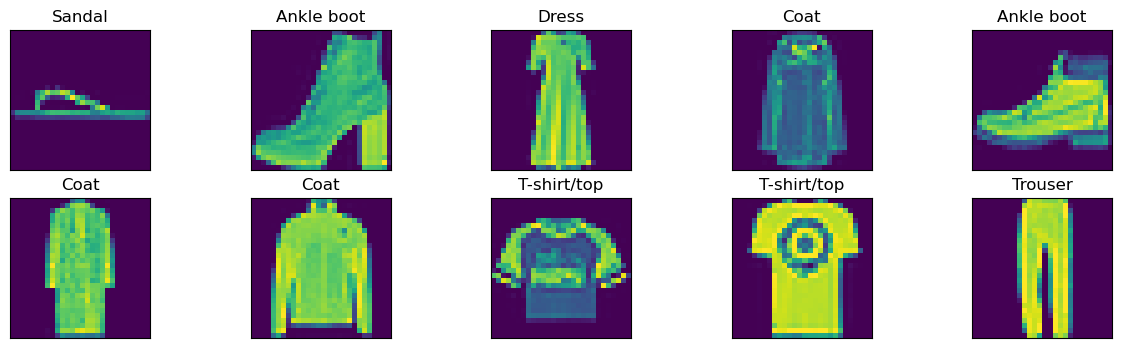

In [4]:
import matplotlib.pyplot as plt
import numpy as np


# function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()  # convert from tensor to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # transpose dimensions


images, labels = next(iter(trainloader))  # get the first batch

# show images with labels
fig = plt.figure(figsize=(15, 4))
plot_size = 10

for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size // 2, idx + 1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(get_class_name(int(labels[idx])))

In [5]:
# Load a pre-trained MobileNetV3 and inspect its structure
import torchvision.models as models

mobilenet_v3_model = models.mobilenet_v3_small(pretrained=True)
print(mobilenet_v3_model)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

/home/sriramramesh/miniconda3/envs/drl_env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sriramramesh/miniconda3/envs/drl_env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
import torch.nn.functional as F
import torchvision.models as models
from torch import nn


# Define a model class that extends the nn.Module class
class MobileNetV3(nn.Module):
    def __init__(self):
        super(MobileNetV3, self).__init__()

        # Load the pre-trained MobileNetV3 (Small) architecture
        self.model = models.mobilenet_v3_small(pretrained=True)

        # Replace the last fully-connected layer with a new one of the right size
        self.model.classifier[3] = nn.Linear(1024, 10)

        # Freeze all the weights of the network except for the last fully-connected layer
        self.freeze()

    def forward(self, x):
        # Convert 1x28x28 input tensor to 3x28x28 tensor, to convert it to a color image
        x = x.repeat(1, 3, 1, 1)

        # Resize the input to 224x224, since MobileNetV3 (Small) expects images of that size
        if x.shape[2:] != (224, 224):
            x = F.interpolate(x, size=(224, 224), mode="bilinear", align_corners=False)

        # Forward pass
        return self.model(x)

    def freeze(self):
        # Freeze all the weights of the network except for the last fully-connected layer
        for param in self.model.parameters():
            param.requires_grad = False

        # Unfreeze the final layer
        for param in self.model.classifier[3].parameters():
            param.requires_grad = True

    def unfreeze(self):
        # Unfreeze all the weights of the network
        for param in self.model.parameters():
            param.requires_grad = True


# Create an instance of the MobileNetV3 model
model = MobileNetV3()
print(model)

MobileNetV3(
  (model): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
            (activation): ReLU()
            (scale_activation): Hardsigmoid()
          )
          (2): Conv2d

In [7]:
import torch
import torch.nn as nn

# Define the loss function and optimizer

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

In [8]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

Using device: cuda


In [10]:
# Create a PyTorch training loop

model = model.to(device)  # Move the model weights to the device

epochs = 1
for epoch in range(epochs):
    for batch_num, (images, labels) in enumerate(trainloader):
        # Move tensors to the device
        images = images.to(device)
        labels = labels.to(device)

        # Zero out the optimizer's gradient buffer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate the loss and perform backprop
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Update the weights
        optimizer.step()

        # Print the loss for every 100th iteration
        if (batch_num) % 100 == 0:
            print(
                "Epoch [{}/{}], Batch [{}/{}], Loss: {:.4f}".format(
                    epoch + 1, epochs, batch_num + 1, len(trainloader), loss.item()
                )
            )

Epoch [1/1], Batch [1/938], Loss: 0.3401
Epoch [1/1], Batch [101/938], Loss: 0.4665
Epoch [1/1], Batch [201/938], Loss: 0.4212
Epoch [1/1], Batch [301/938], Loss: 0.4053
Epoch [1/1], Batch [401/938], Loss: 0.4760
Epoch [1/1], Batch [501/938], Loss: 0.6531
Epoch [1/1], Batch [601/938], Loss: 0.2911
Epoch [1/1], Batch [701/938], Loss: 0.6150
Epoch [1/1], Batch [801/938], Loss: 0.3403
Epoch [1/1], Batch [901/938], Loss: 0.4551


In [11]:
# Print the loss and accuracy on the test set
correct = 0
total = 0
loss = 0

for images, labels in testloader:
    # Move tensors to the configured device
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss += loss_fn(outputs, labels)

    # torch.max return both max and argmax. We get the argmax here.
    _, predicted = torch.max(outputs.data, 1)

    # Compute the accuracy
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(
    "Test Accuracy of the model on the test images: {} %".format(100 * correct / total)
)
print("Test Loss of the model on the test images: {}".format(loss))

Test Accuracy of the model on the test images: 85.29 %
Test Loss of the model on the test images: 64.81927490234375


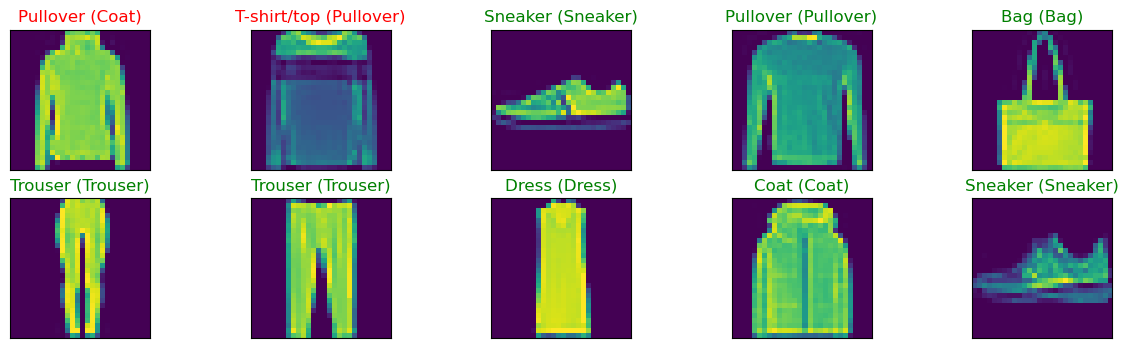

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Get the first batch of images and labels
images, labels = next(iter(testloader))

# Move tensors to the configured device
images = images.to(device)
labels = labels.to(device)

# Forward pass
outputs = model(images)
_, predicted = torch.max(outputs.data, 1)

# Plot the images with labels, at most 10
fig = plt.figure(figsize=(15, 4))

for idx in np.arange(min(10, len(images))):
    ax = fig.add_subplot(2, 10 // 2, idx + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images.cpu()[idx]))
    ax.set_title(
        "{} ({})".format(get_class_name(predicted[idx]), get_class_name(labels[idx])),
        color=("green" if predicted[idx] == labels[idx] else "red"),
    )

In [1]:
# Use a foundation model to build a spam email classifier
# Step:1 - Idenmtify and gather relevant data
from datasets import load_dataset

dataset = load_dataset("sms_spam", split=["train"])[0]

for entry in dataset.select(range(3)):
    sms = entry["sms"]
    label = entry["label"]
    print(f"label={label}, sms={sms}")

/home/sriramramesh/miniconda3/envs/drl_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 5574/5574 [00:00<00:00, 412132.68 examples/s]

label=0, sms=Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

label=0, sms=Ok lar... Joking wif u oni...

label=1, sms=Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's



In [2]:
# Convenient dictionaries to convert between labels and ids
id2label = {0: "NOT SPAM", 1: "SPAM"}
label2id = {"NOT SPAM": 0, "SPAM": 1}

for entry in dataset.select(range(3)):
    sms = entry["sms"]
    label_id = entry["label"]
    print(f"label={id2label[label_id]}, sms={sms}")

label=NOT SPAM, sms=Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

label=NOT SPAM, sms=Ok lar... Joking wif u oni...

label=SPAM, sms=Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's



In [3]:
# Let's start with this helper function that will help us format sms messages
# for the LLM.
def get_sms_messages_string(dataset, item_numbers, include_labels=False):
    sms_messages_string = ""
    for item_number, entry in zip(item_numbers, dataset.select(item_numbers)):
        sms = entry["sms"]
        label_id = entry["label"]

        if include_labels:
            sms_messages_string += (
                f"{item_number} (label={id2label[label_id]}) -> {sms}\n"
            )
        else:
            sms_messages_string += f"{item_number} -> {sms}\n"

    return sms_messages_string


print(get_sms_messages_string(dataset, range(3), include_labels=True))

0 (label=NOT SPAM) -> Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 (label=NOT SPAM) -> Ok lar... Joking wif u oni...

2 (label=SPAM) -> Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


